### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    y_train_encoded[np.where(cond), each_class] = 1

In [3]:
def one_hot(y):
    y = np.array(y)

    m = y.shape[0]

    y_one_hotted = np.zeros((m, k))

    for i, label in enumerate(y):
        y_one_hotted[i, label ] = 1

    return y_one_hotted

# With the iris data given in class, implement train_test_split from scratch.


In [4]:

def train_test_split(X, y, test_size=0.15):
    assert X.shape[0] == y.shape[0]

    m = X.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)

    split_index = round(m * test_size)

    train_indices, test_indices = indices[split_index:], indices[:split_index]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(128, 2) (22, 2)


In [5]:
# Step 2: Fit your data

def logistic_regression_GD(X, y, k, n, max_iter=1000):
    '''
    Inputs: 
        X shape: (m, n)
        w shape: (n, k)
    '''
    w = np.random.rand(n, k)
    l_rate = 0.01
    for i in range(max_iter):
        cost, grad =  gradient(X, y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        w = w - l_rate * grad
    return w, i

# for those who tend to feel overwhelmed with lots of code
# I recommend you to write each part of the code separately as function
# it helps!
def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    cost = - np.sum(y*np.log(h)) / m
    error = h - y
    grad = softmax_grad(X, error)
    return cost, grad

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def softmax_grad(X, error):
    return  X.T @ error
        
def h_theta(X, w):
    '''
    Input:
        X shape: (m, n)
        w shape: (n, k)
    Returns:
        yhat shape: (m, k)
    '''
    return softmax(X @ w)



# Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

In [6]:
import math
import time

class LogisticRegression:
    def __init__(self, method='batch', batch_size=None, learning_rate=0.0001, max_iter=5000, verbose=True):
        self.method = method
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.verbose = verbose
        
        valid_methods = ["batch", "minibatch", "sto"]
        if method not in valid_methods:
            raise ValueError(f'method must be one of {valid_methods}')
            
    def fit(self, X, y):
        self.losses = []
        
        m = X.shape[0]
        n = X.shape[1]
        
        k = len(np.unique(y))
        
        y = one_hot(y)
        
        self.w = np.random.rand(n, k)
        old_loss = np.inf
        
        if self.method == 'batch' and self.batch_size == None:
            self.batch_size = m # using whole training samples
        elif self.method == 'sto' and self.batch_size == None:
            self.batch_size = 1 # using 1 training sample
            
        step_size = math.ceil(m / self.batch_size)
        
        start = time.time()
        for i in range(self.max_iter):
            for step in range(step_size):
                X_batch = X[step * self.batch_size: step * self.batch_size + self.batch_size]
                y_batch = y[step * self.batch_size: step * self.batch_size + self.batch_size]
                assert len(X_batch == self.batch_size)
                cost, grad =  gradient(X_batch, y_batch, self.w )
                self.losses.append(cost)

                self.w = self.w - self.learning_rate * grad
                
            if i %1000 == 0 and self.verbose:
                print(f'epoch {i}: cost {cost}')

        end = time.time()
        print('Time taken', end - start, 'second(s)\n')
    
    def predict(self, X):
        y_predicted = h_theta(X, self.w)
        return np.argmax(y_predicted, axis=1)
    
    def plot_loss(self):
        plt.figure()
        display(plt.plot(self.losses))

# Calculate time taken to fit your models using different training methods.
# Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.


Batch
epoch 0: cost 1.1815575911247542
epoch 1000: cost 0.08521636259514787
epoch 2000: cost 0.08200398314794316
epoch 3000: cost 0.08121636492562338
epoch 4000: cost 0.08090983233808015
Time taken 0.4349997043609619 second(s)



Mini-Batch
epoch 0: cost 0.6540296818726389
epoch 1000: cost 0.009702322672441758
epoch 2000: cost 0.005669323820414332
epoch 3000: cost 0.004238350430871388
epoch 4000: cost 0.0035290264816117867
Time taken 1.1540207862854004 second(s)



Stochastic
epoch 0: cost 0.623578037381782
epoch 1000: cost 0.03625959558051261
epoch 2000: cost 0.02265701227899437
epoch 3000: cost 0.018496656673317416
epoch 4000: cost 0.016716010033674532
Time taken 25.094998359680176 second(s)



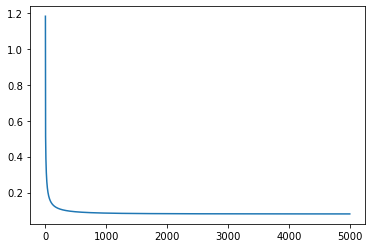

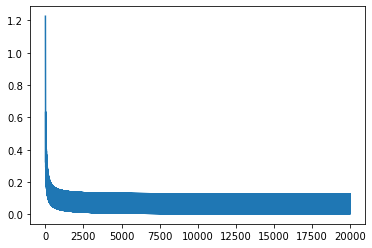

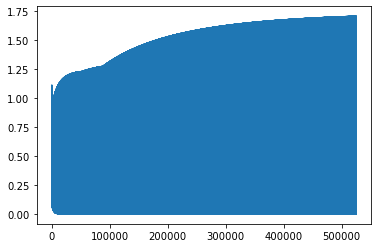

In [242]:

print('Batch')
cls = LogisticRegression(learning_rate=0.01, max_iter=5000)
cls.fit(X_train, y_train)
cls.plot_loss()

print('Mini-Batch')
cls = LogisticRegression(learning_rate=0.01, max_iter=5000, method='minibatch', batch_size=32)
cls.fit(X_train, y_train)
cls.plot_loss()

print('Stochastic')
cls = LogisticRegression(learning_rate=0.01, max_iter=5000, method='sto')
cls.fit(X_train, y_train)
cls.plot_loss()

In [243]:
print('input invalid method')
cls = LogisticRegression(learning_rate=0.01, max_iter=5000, method='hello?')
cls.fit(X_train, y_train)
cls.plot_loss()

input invalid method


ValueError: method must be one of ['batch', 'minibatch', 'sto']

# Simply, use classification_report from sklearn.metrics to evaluate your models.

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept


print('Batch')
cls = LogisticRegression(learning_rate=0.001, max_iter=5000, method='batch', verbose=False)
cls.fit(X_train, y_train)
yhat = cls.predict(X_test)
print("Report: ", classification_report(y_test, yhat))

print('Mini-Batch')
cls = LogisticRegression(learning_rate=0.01, max_iter=5000, method='minibatch', batch_size=32, verbose=False)
cls.fit(X_train, y_train)
yhat = cls.predict(X_test)
print("Report: ", classification_report(y_test, yhat))

print('Stochastic')
cls = LogisticRegression(learning_rate=0.01, max_iter=5000, method='sto', verbose=False)
cls.fit(X_train, y_train)
yhat = cls.predict(X_test)
print("Report: ", classification_report(y_test, yhat))

Batch
Time taken 0.4239985942840576 second(s)

Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Mini-Batch
Time taken 1.1514816284179688 second(s)

Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Stochastic
Time taken 24.322064876556396 second(s)

Report:                precision    recall  f1-score   support

     

# Discuss your results ie. training losses of the three methods and time taken to fit models.

According to the result from task 5. The final accuracy is the same regarding any method, but the losses fluctuate a lot in `mini-batch` methood and fluctuate even more in the `stochastic` method.

For the training time, `mini-batch` and `stochastic` take significant longer time than normal `batch` method, especially `stochastic`, one reason that could explaining this is we didn't exploit numpy's efficient vectorization operation much but instead use explicit for loop for every sample.